## 중앙대학생 커뮤니티 에브리타임에서 '취업'을 키워드로 한 게시글 분석 및 word2vec과 LDA 비교

### 팀 : 심규현(20154731) 윤희상(20154576)

In [990]:
import requests
from bs4 import BeautifulSoup as bs
from selenium import webdriver

In [842]:
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False
import seaborn as sns

### 에브리타임에서 '취업'을 키워드로 검색했을 때 나오는 게시물들 크롤링

In [115]:
# 206부터 출력된 이유는 중간에 두번 꺼져서 이어서 다시 실행하다보니 그런것입니다
# 밑의 에러는 제가 300까지만 실행하고 중단해서 뜬 것입니다
# https://yeoulcoding.tistory.com/121 < 요 사이트의 코드를 참고하였습니다.


driver = webdriver.Chrome('D:\python ex\텍스트마이닝3\chromedriver.exe')
driver.implicitly_wait(1)

# go to the login page & login
driver.get('https://everytime.kr/login')
driver.find_element_by_name('userid').send_keys('yheesang8')
driver.find_element_by_name('password').send_keys('*******') # 비밀번호 감춤
driver.find_element_by_xpath('//*[@class="submit"]/input').click()
driver.implicitly_wait(1)

# driver.get('https://everytime.kr/search/all/%EC%B7%A8%EC%97%85')

# result text files
results = []
cnt = 0



topic_list = []

while True:

    print('Page '+str(cnt))
    
    if cnt > 300:
        break
        
    cnt = cnt + 1
    driver.get('https://everytime.kr/search/all/%EC%B7%A8%EC%97%85/p/'+ str(cnt)) # '취업' 검색결과로 한 사이트 주소
    driver.implicitly_wait(1)

    # get articles link
    posts = driver.find_elements_by_css_selector('article > a.article')
    links = [post.get_attribute('href') for post in posts]
    

    
    # get detail article
    for link in links:
        driver.get(link)
        
        data = {}
        # get text
        try:
            topic = driver.find_element_by_css_selector('article h2.large').text
            description = driver.find_element_by_css_selector('article p.large').text.replace('\n', '')
            comments = driver.find_elements_by_css_selector('p.large')  ## 여기서 p.large가 article 부분에도 있고(본문) comment부분에도 있는데(댓글) 그냥 p.large로 해서 뒤에 보시면 첫 댓글에 본문이 반복됩니다 ㅠㅠ.. 다시 돌리기엔 너무 오래걸려서..
            vote = driver.find_element_by_css_selector('article li.vote').text
            scrap  = driver.find_element_by_css_selector('article li.scrap').text

            data['topic'] = topic
            data['description'] = description
            data['vote'] = vote
            data['scrap'] = scrap

            i = 0
            for comment in comments:
                i += 1
                data['댓글 {0}'.format(i)] = comment.text.replace('\n','')

            topic_list.append(data)
            
            
        except:
            pass

Page 206
Page 207
Page 208
Page 209
Page 210
Page 211
Page 212
Page 213
Page 214
Page 215
Page 216
Page 217
Page 218
Page 219
Page 220
Page 221
Page 222
Page 223
Page 224
Page 225
Page 226
Page 227
Page 228
Page 229
Page 230
Page 231
Page 232
Page 233
Page 234
Page 235
Page 236
Page 237
Page 238
Page 239
Page 240
Page 241
Page 242
Page 243
Page 244
Page 245
Page 246
Page 247
Page 248
Page 249
Page 250
Page 251
Page 252
Page 253
Page 254
Page 255
Page 256
Page 257
Page 258
Page 259
Page 260
Page 261
Page 262
Page 263
Page 264
Page 265
Page 266
Page 267
Page 268
Page 269
Page 270
Page 271
Page 272
Page 273
Page 274
Page 275
Page 276
Page 277
Page 278
Page 279
Page 280
Page 281
Page 282
Page 283
Page 284
Page 285
Page 286
Page 287
Page 288
Page 289
Page 290
Page 291
Page 292
Page 293
Page 294
Page 295
Page 296
Page 297
Page 298
Page 299
Page 300


WebDriverException: Message: chrome not reachable
  (Session info: chrome=87.0.4280.66)


### 크롤링으로 얻은 비정형 데이터를 딕셔너리에 담은 형태
- 제목(topic)
- 본문(description)
- 추천수(vote)
- 스크랩수(scrap)
- 댓글(댓글 1, 댓글 2 ... )
##### 단, 실수로 댓글1에 본문이 저장됨 진짜 댓글은 댓글2부터라고 보면 됨
##### 아래 예시

In [999]:
topic[3]

{'topic': '레인보우시스템 취업 멘토링',
 'description': '오늘까지 7기 모집하는 것 같은데참여해신 분 계신가요?!어떤지 궁금합니다!',
 'vote': '0',
 'scrap': '0',
 '댓글 1': '오늘까지 7기 모집하는 것 같은데참여해신 분 계신가요?!어떤지 궁금합니다!',
 '댓글 2': '공대한테는 큰 도움 안되는거 같아요',
 '댓글 3': '감사합니다~',
 '댓글 4': '저는 뻔한 이야기만 한다는 느낌이었어요! 유튜브에서 흔하게 하는 이야기들만 나열하는 느낌이라서 진짜 완전완전 취업 초보자 아니면 큰 도움 안될 것 같습니다',
 '댓글 5': '궁금',
 '댓글 6': '진짜 별로입니다.. 시간낭비...',
 '댓글 7': '아.. 감사합니다~'}

In [359]:
print('크롤링한 게시물의 수는 {0}개이다.'.format(len(topic)))

크롤링한 게시물의 수는 4368개이다.


In [361]:
from gensim import corpora, models
from gensim.models import word2vec
import re
from konlpy.tag import Okt

### word2vec을 통한 본문, 댓글 분석

In [1037]:
results = [] # 모든 게시글의 단어를 토큰화해서 저장해둘 곳

okt = Okt()
# 불용어


for post in topic:
    r = []
    
    for key in post.keys():
        if not key in ['topic', 'description', 'vote', 'scrap']: # 본문이랑 댓글 분석 / 본문이 댓글 1에 해당되므로 중복을 제거하기 위해 description 제외


        #     r = ' '.join(r)
        #     r = re.sub('[-=.,#/?!:$%{}…ㅠ~ㅜㅋㅎㅌ><ㄷname^ㄱㄴㄲ;12]', '', r)

            x = []
            tokens = okt.pos(post[key], norm = True, stem = True)
            for (word, pos) in tokens:
                if not pos in ['Josa', 'Eomi', 'Punctuation','KoreanParticle']:
                    
                    x.append(word)

            results.append((" ".join(x)).strip())  
    
    
output = (" ".join(results)).strip()
output = re.sub('[-=.,#/?!:$%{}…ㅠ~ㅜㅋㅎㅌ><ㄷname^ㄱㄴㄲ;1234567890]', '', output) # 부호, 기호, 숫자 제거해줬다.

### 단어들을 하나의 띄어쓰기로 구분된 str 형식으로 연결해준 output 형태

In [1038]:
output[:1000]

'갈수록 사회 우리 학교 위상 드높다 가다 인식 비롯 하다 취업 결과 대기업 임원진 등 학생 들 정작 우리 학교 못 끄다 내다 안달 취업 결과 임원진 과거 시점 이미 그로 인하다 높아지다 입결 더 수준 높다 학생 오니 불만 생기지 특히 나 이공 계 경우 인프라 더욱 현 대화 되다 투자 액수 많다 다른 학교 다니다 친구 비교 하다 흠 그저 아쉬움 이과 키우다 킹 앙 대다 되다 제발 근데 정작 학교 공대 돈 조금 갖다 주다 호구 봄 본인 노력 안 하명 너무 끄다 내리다 하다 안좋다 저런 단 적 지표 우리 학교 그저 좋다 하다 생각 하다 안되다 우리 학교 우수 인재 많다 그런 거지 분명 입결 낮다 아웃 풋 별로 학교 들 더 많다 기회 제공 해주다 않다  우왕 축하 하다   내년 군 제대 복학 하다 너무 두렵다 저 바라보다 새내기 들 눈빛 나 새내기 이다 때   보다 왜 아직도 취업 못 하다 하다 쳐다보다 삭제 되다 댓글 이다 새내기 때 노인 공 경하 않다 제 너무 후회되다 저   보다 되게 신기하다 액트 새내기 거의 없다 이 학년 필수 교양 아니다 저 같다 사람 많다 가보다 듣기 싫다 미루다 저 이번 하다 더더 고 학번 있다 걱정 마 감사하다 솔직하다 군대 때문  남자 내년 학교 있다 정상 임 흑 흑 위로 되다 저  학번 전  학번 선배 님 밥약 해봤다 저 그냥 뭐 아무 생각 안 나다 걱정 말다 놀다 감사하다   같이 조 별 하다 그냥 아무 생각 안 듬 하지만 조 별 활동 말 안 하다 가만히 있다 개 빡치다 저  도 보다 는걸 별 생각 없다 아무 생각 안 들다 걱정 말다   학번 아무 느낌 없다  이상 되어다 좀 고 학번 같다 작년  봄 작년 기준   가다 제일 많다 평범하다 오늘  기 모집 하다 것 같다 참여 해신 분 계시다 어떻다 궁금하다 공대 늘다 크다 도움 안되다 같다 감사하다 저 뻔하다 이야기 한다는 느끼다 유튜브 흔하다 하다 이야기 들 나열하다 느낌 진짜 완전 완전 취업 초보자 아니다 크다 도움 안되다 것 같다 궁금 진짜 별로 이다 시간 낭비 아 감사하다

In [1039]:
output_words = output.split()
print('해당 str에 포함된 단어 개수는 {0}개 이다.'.format(len(output_words)))

해당 str에 포함된 단어 개수는 984991개 이다.


### 빈도수 분석
##### 아무래도 불용어 제거도 없고 품사도 명사만 포함시킨 것이 아니라 큰 의미를 찾아볼 순 없었다.
##### 그나마 '취업', '활동', '분석' 이 유의미한 단어라고 생각된다.

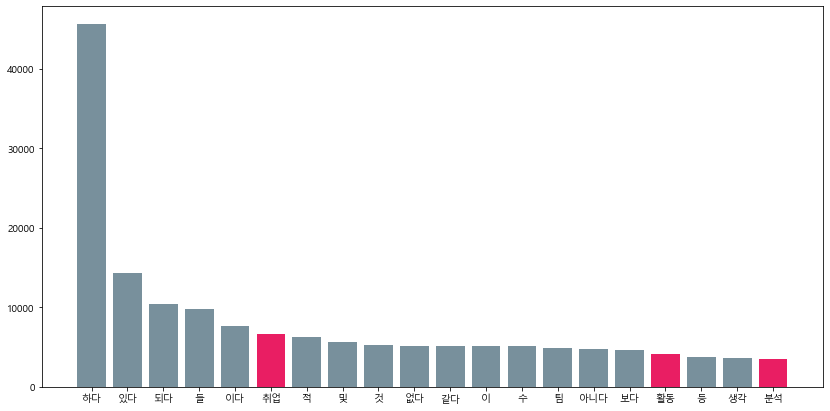

In [1040]:
data = pd.DataFrame(output_words)
data = data[0].value_counts().sort_values(ascending = False)[:20]
fig, ax = plt.subplots(figsize = (14,7))
color = ['#78909c', '#78909c','#78909c','#78909c','#78909c','#e91e63','#78909c','#78909c','#78909c','#78909c','#78909c','#78909c','#78909c','#78909c','#78909c','#78909c','#e91e63','#78909c','#78909c','#e91e63',]
plt.bar(x= data.index, height = data.values, color = color)
plt.show()

### 위의 아웃풋을 txt 형식으로 저장

In [1030]:
with open("final_raw.txt", "w", encoding="utf-8") as final:
    final.write(output)

### 해당 txt파일을 이용하여 model을 training 시켜준 후 저장
#### skipgram 채택

In [1031]:
# model
data = word2vec.LineSentence("final_raw.txt")
model_skip = word2vec.Word2Vec(data,        #a list of lists of tokens or larger corpora
                               size= 100,   #the number of dimensions of the embeddings and the default is 100
                               window=10,   #the maximum distance between a target word and words around the target word
                               hs=1,        #hierarchical softmax
                               min_count=2, #words with occurrence less than this count will be ignored 
                               sg=1         #Training algorithm: 1 for skip-gram; otherwise CBOW.
                               )
model_skip.save("final_model")

### 필요할 때, 해당 모델을 로드해서 사용 가능

In [1041]:
# use
model_skip = word2vec.Word2Vec.load("final_model")

### '데이터', '분석', '직무'와 유사성 높은 단어들을 알아보았다.
##### 눈여겨 볼 단어로는 경제지표, 통계, 차트, 리핑, software가 있었다.
##### 데이터 분석 직무를 지원하기 위해서 통계, 차트 및 컴퓨터 소프트웨어 부분의 역량이 필요한 것으로 보인다

In [1042]:
model_skip.wv.most_similar(positive=["데이터",'분석','직무'])

[('경제지표', 0.702167272567749),
 ('취준한', 0.6848910450935364),
 ('GE', 0.6589425802230835),
 ('리핑', 0.6527091860771179),
 ('sw', 0.6397891640663147),
 ('통계', 0.6237381100654602),
 ('차트', 0.6226292848587036),
 ('🔭', 0.6059374809265137),
 ('과거', 0.6051945686340332),
 ('GVC', 0.603861391544342)]

### 다음으로 본인이 관심있는 분야인 빅데이터와 마케팅, 분석을 같이 묶어서 유사성을 보았다.
#### ux, software, 리핑 등이 그나마 관련있어보이는 용어로 보인다

In [1043]:
model_skip.wv.most_similar(positive=['빅데이터','마케팅','분석'])

[('리핑', 0.7449727058410645),
 ('ux', 0.7249801158905029),
 ('sw', 0.7164514660835266),
 ('마케터', 0.7144175171852112),
 ('GE', 0.6644139289855957),
 ('🔭', 0.6629958152770996),
 ('httpswwwfcbookcorktigstorybook', 0.654200553894043),
 ('그마', 0.636788010597229),
 ('취준한', 0.6282520294189453),
 ('법쪽', 0.6244839429855347)]

In [1044]:
words = list(model_skip.wv.vocab)
print('총 {0}개의 단어로 구성되었다.'.format(len(words)))

총 14655개의 단어로 구성되었다.


### 코사인 유사도 방법은 각도(radian)을 기반으로 단어간 관계를 구하는 방법으로 벡터의 크기에 영향을 받지 않는다.
### 이에 코사인 유사도 방법 말고 벡터간 거리를 기반으로 계산해보았다.
##### https://woolulu.tistory.com/133 << 참고했습니다

In [1036]:
from scipy.spatial import distance_matrix

In [815]:
vectors = model_skip.wv.vectors # 벡터행렬
names = model_skip.wv.index2word # 단어명

distance = distance_matrix(vectors, vectors)

distance_df = pd.DataFrame(distance, columns=names, index=names)

In [1018]:
distance_df.shape

(14655, 14655)

In [816]:
distance_df.head()

,하다,있다,되다,들,이다,취업,적,및,것,없다,...,정역,😝✨♥️✅,심슨,국민의당,응용수학,집부,굼벵이,궁물,저물다,블밀
하다,0.000000,0.908876,0.973607,1.158830,1.396935,1.274724,1.645112,3.228940,1.105670,1.179429,...,1.650196,2.296594,1.613285,1.500148,1.509942,1.670433,1.313886,1.560347,1.816504,1.531215
있다,0.908876,0.000000,1.193385,1.332793,1.558300,1.492863,1.727946,3.244472,1.270403,1.175996,...,1.699316,2.306826,1.780435,1.583911,1.612366,1.840207,1.550383,1.693482,1.907947,1.683045
되다,0.973607,1.193385,0.000000,1.497551,1.253344,1.225934,1.871301,3.120426,1.388653,1.307531,...,1.600313,2.363338,1.854087,1.610575,1.617883,2.000305,1.527031,1.706623,1.947437,1.737858
들,1.158830,1.332793,1.497551,0.000000,1.767079,1.644802,1.806390,3.350909,1.450272,1.488180,...,1.858615,2.409378,1.948992,1.675780,1.731258,1.782591,1.527264,1.629596,2.063030,1.944911
이다,1.396935,1.558300,1.253344,1.767079,0.000000,1.662442,2.181244,3.271421,1.664280,1.828758,...,1.952316,2.414682,2.170206,1.849081,1.851781,2.133361,1.769330,1.942142,2.227021,1.923768


In [869]:
# 인자로 받는 단어와 가장 거리가 가까운 단어 10가지 호출
def findsimilar(word):
    data = distance_df[word].sort_values(ascending = True)[1:11] # 0번째는 자기 자신이어서 제외
    print('<\'{0}\' 과(와) 유사한 단어들>\n'.format(word))
    for i in range(len(data)):
        print('{1}번째는 \'{2}\' 입니다.'.format(word, i+1, data.index[i]))

#### 벡터간 거리를 통해 구한 비슷한 단어 Top10과 코사인 유사도를 통해 구한 단어 Top10간 큰 차이가 없음을 알 수 있었습니다.
#### 단어 '데이터'의 경우 총 10개 중 8개의 공통된 단어가 순서만 다르고 포함되었습니다.
- 거리 기반 : 추론, Jv
- 각도 기반 : 요약, 해석

In [870]:
findsimilar('데이터')

<'데이터' 과(와) 유사한 단어들>

1번째는 '과거' 입니다.
2번째는 '통계' 입니다.
3번째는 '상황' 입니다.
4번째는 '경제지표' 입니다.
5번째는 '수많다' 입니다.
6번째는 '현재' 입니다.
7번째는 '부정' 입니다.
8번째는 '추론' 입니다.
9번째는 'Jv' 입니다.
10번째는 '취준한' 입니다.


In [871]:
model_skip.wv.most_similar(positive=["데이터"])

[('과거', 0.759448230266571),
 ('경제지표', 0.7561600804328918),
 ('통계', 0.6400367021560669),
 ('상황', 0.6305670142173767),
 ('해석', 0.5943640470504761),
 ('수많다', 0.5889489054679871),
 ('취준한', 0.5797925591468811),
 ('요약', 0.5525305271148682),
 ('현재', 0.5507230162620544),
 ('부정', 0.5357623100280762)]

### 각 단어의 벡터값을 차원축소하여 시각화해보기
#### 14655개 단어에 100차원 벡터를 DataFrame으로 만들어보았다

In [764]:
word_score = model_skip.wv.__getitem__(words)
df = pd.DataFrame(word_score, index = words)
df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
갈수록,0.392138,0.165638,-0.225095,-0.021013,0.221091,0.204345,0.060363,0.156139,-0.246105,-0.195165,...,-0.086176,0.253432,0.524575,-0.138195,-0.120410,0.196001,-0.462133,0.293179,0.307376,-0.100732
사회,0.163805,0.337237,0.221253,0.178376,-0.219565,0.247019,-0.052731,0.114004,-0.178094,0.184950,...,-0.109744,-0.345275,0.230990,-0.119513,-0.086431,-0.140212,-0.280189,0.533489,0.001249,0.501747
우리,-0.053289,0.157136,0.051298,0.035111,0.020530,0.171727,-0.099816,-0.008722,-0.050650,0.427149,...,0.227414,0.225931,0.343842,0.060011,-0.227725,0.033601,-0.304240,0.208915,0.032529,-0.125102
학교,0.228219,0.190163,0.380919,0.161074,0.243556,0.287320,-0.030214,0.294634,-0.201074,0.080603,...,0.155293,-0.116678,0.400659,0.033137,-0.288034,-0.208615,-0.405022,0.225907,0.164836,-0.038927
위상,0.218947,0.035676,-0.074906,0.224210,0.414446,0.156533,0.030912,0.252318,-0.351584,0.108832,...,0.112211,0.304929,0.407572,-0.070553,-0.341720,0.260452,-0.127126,0.092277,-0.150754,-0.134631


### 단어들의 관계를 시각적으로 표현해보기 위해 PCA를 통해 기존 100차원에서 2차원으로 줄여주고 산점도 그래프로 나타내보았다.
### 14655개의 단어를 한번에 보이기에는 너무 많아서 500개만 추려서 보았다

In [765]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(df)
pca_df = pd.DataFrame(pca.transform(df), index = words)

In [766]:
pca_df = pca_df[:500]

### 하지만 그다지 직관적으로 단어들간의 관계가 보이지는 않는거 같다
#### 이모티콘, 부호? 탓에 에러가 뜨는 것으로 보임

C:\Users\msi\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 55357 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\msi\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 56877 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\msi\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 56834 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\msi\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 55357 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\msi\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 56877 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\msi\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 56834 missing from current font.
  f

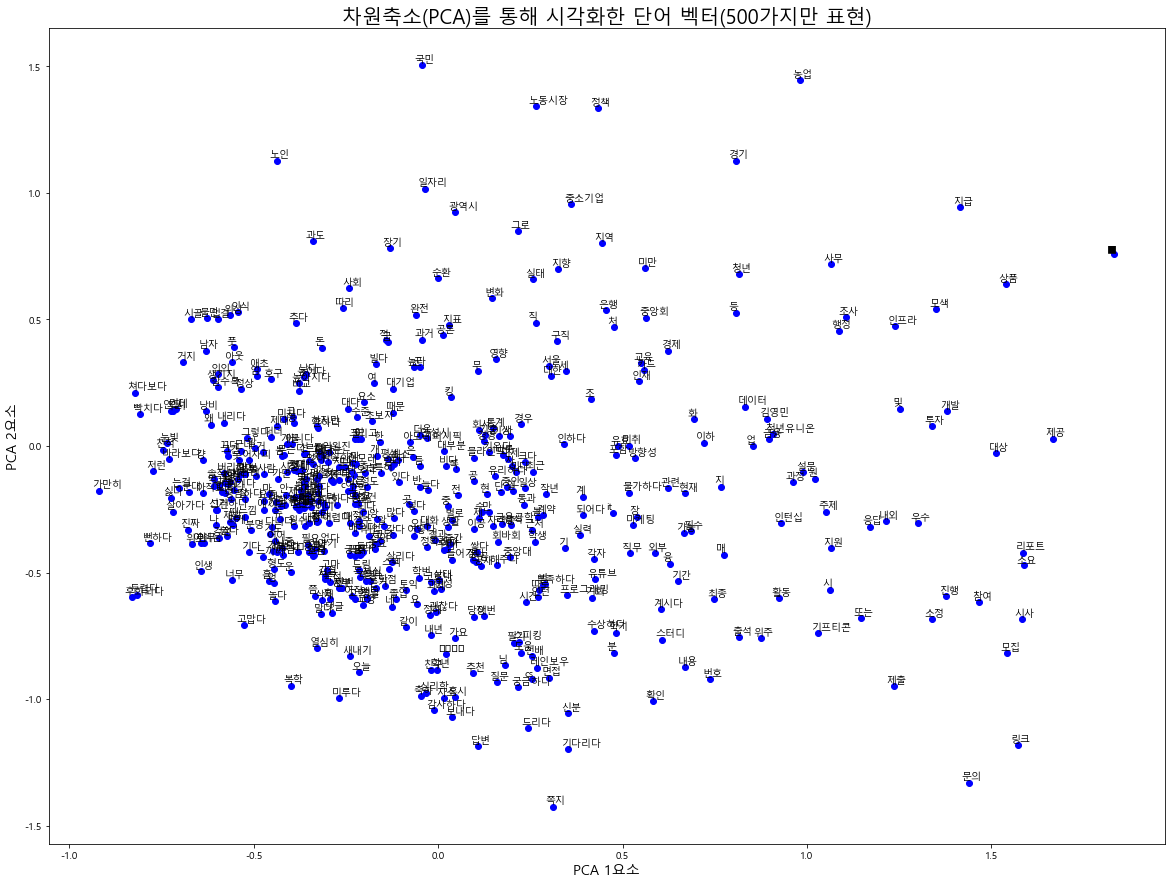

In [767]:
fig, ax= plt.subplots(figsize = (20,15))
plt.scatter(pca_df.iloc[:,0], pca_df.iloc[:, 1], color = 'blue')
plt.xlabel('PCA 1요소', fontsize = 14)
plt.ylabel('PCA 2요소', fontsize = 14)
plt.title('차원축소(PCA)를 통해 시각화한 단어 벡터(500가지만 표현)', fontsize = 20)
for i, word in enumerate(words[:500]):
    plt.annotate(word, xy = (pca_df.iloc[i,0] - 0.02, pca_df.iloc[i, 1] + 0.012))

plt.show()

### 군집분석을 통해 비슷한 단어들끼리 묶어보도록 하였다.
#### PCA해서 얻은 두 가지 축값을 기준으로 KMeans 방법을 이용해보았다

In [679]:
from sklearn.cluster import KMeans

### 적절한 군집 개수를 구하기 위해 군집 개수별 오차제곱합(SSE)의 값을 비교해보았다.
#### 참고 : https://m.blog.naver.com/PostView.nhn?blogId=samsjang&logNo=221017639342&proxyReferer=https:%2F%2Fwww.google.com%2F

In [680]:
def elbow(df):
    sse = []
    for i in range(1,11):
        kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
        kmeans.fit(df)
        sse.append(kmeans.inertia_)
        
    plt.plot(range(1,11), sse, marker = 'o')
    plt.xlabel('클러스터 개수')
    plt.ylabel('SSE')

### 4개일 때, 최적의 군집수인 것으로 판단하였다

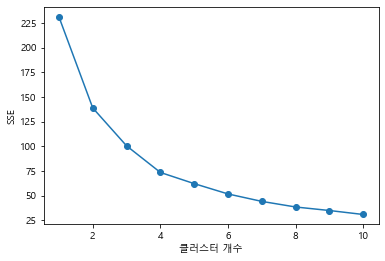

In [681]:
elbow(pca_df)
plt.show()

In [682]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, random_state = 0)

In [769]:
kmeans.fit(pca_df)
kmeans.labels_

array([1, 3, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 3, 2, 1, 1, 1, 1, 1, 1, 3,
       1, 1, 3, 3, 1, 1, 1, 1, 3, 2, 1, 1, 1, 1, 2, 2, 3, 0, 1, 2, 2, 1,
       0, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 3, 2, 1, 1, 0, 3, 1, 1, 1, 1, 1,
       1, 2, 2, 0, 2, 1, 2, 2, 2, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1,
       1, 2, 2, 3, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 0, 2, 1, 1, 1, 1, 2, 1,
       2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1,
       1, 1, 1, 2, 1, 2, 3, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 3, 2, 1,
       2, 3, 1, 1, 2, 2, 0, 1, 0, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1,
       1, 1, 3, 1, 2, 2, 1, 1, 2, 2, 3, 3, 2, 3, 0, 3, 0, 3, 1, 3, 1, 0,
       3, 3, 3, 3, 2, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3, 2, 2, 2,
       3, 0, 0, 0, 0, 2, 2, 2, 0, 3, 0, 2, 0, 0, 2, 2, 0, 2, 0, 0, 0, 2,
       0, 0, 0, 3, 3, 0, 2, 2, 3, 1, 1, 1, 2, 2, 1, 1, 2, 3, 1, 2, 1, 2,
       3, 2, 1, 3, 1, 1, 2, 2, 2, 1, 1, 1, 2, 0, 2,

### kmeans로 예측한 라벨 값을 기존 데이터프레임에 새로운 컬럼으로 추가해줬다

In [770]:
pca_df['label'] = kmeans.labels_
pca_df['label'].value_counts()

1    225
2    158
3     59
0     58
Name: label, dtype: int64

In [771]:
pca_df = pca_df.rename(columns = {0 : 'pca_x', 1 : 'pca_y'})

In [772]:
pca_df.head(5)

,pca_x,pca_y,label
갈수록,-0.596667,0.233142,1
사회,-0.240384,0.624489,3
우리,-0.356823,-0.130316,1
학교,-0.216412,-0.225235,1
위상,-0.562729,0.517500,1


C:\Users\msi\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 55357 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\msi\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 56877 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\msi\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 56834 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\msi\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 55357 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\msi\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 56877 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\msi\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 56834 missing from current font.
  f

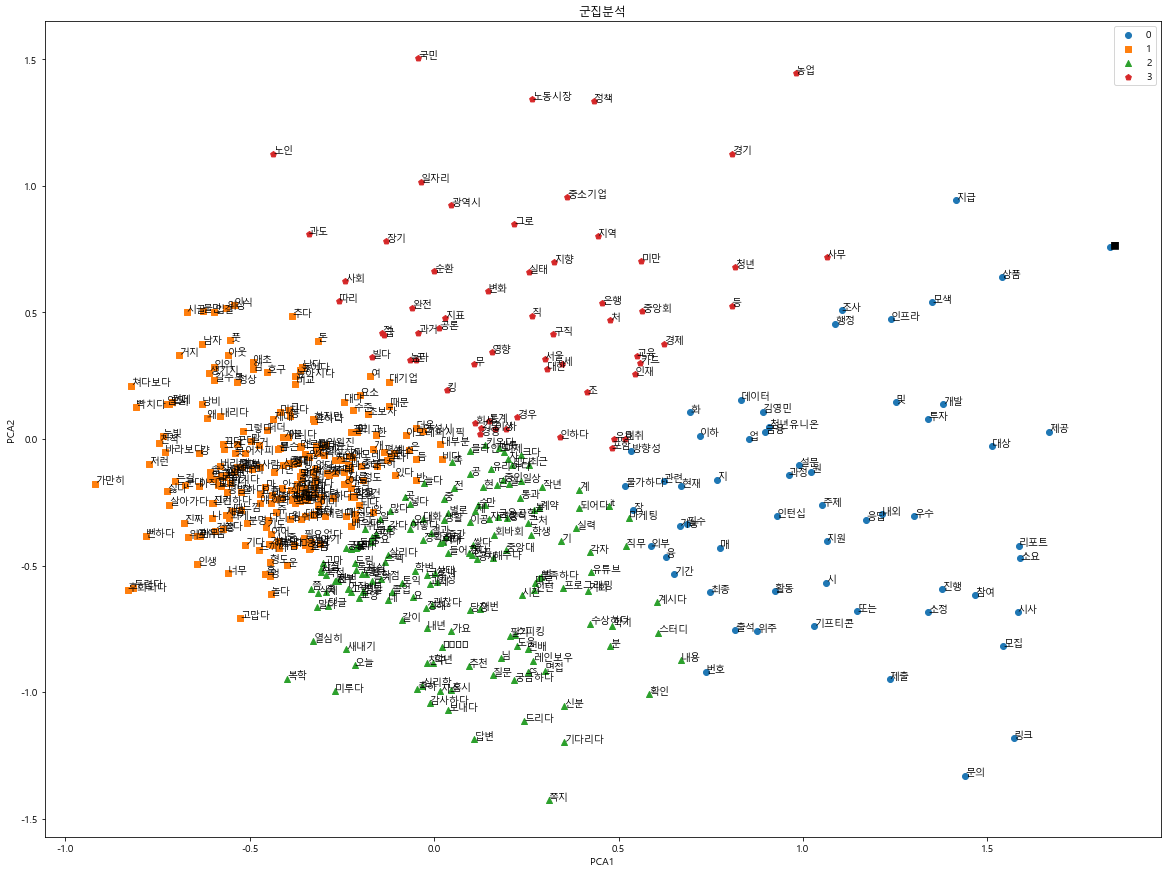

In [773]:
fig, ax = plt.subplots(figsize = (20,15))
marker0 = pca_df[pca_df['label'] == 0].index
marker1 = pca_df[pca_df['label'] == 1].index
marker2 = pca_df[pca_df['label'] == 2].index
marker3 = pca_df[pca_df['label'] == 3].index

plt.scatter(x = pca_df.loc[marker0, 'pca_x'], y = pca_df.loc[marker0, 'pca_y'], marker = 'o', label = '0')
plt.scatter(x = pca_df.loc[marker1, 'pca_x'], y = pca_df.loc[marker1, 'pca_y'], marker = 's', label = '1')
plt.scatter(x = pca_df.loc[marker2, 'pca_x'], y = pca_df.loc[marker2, 'pca_y'], marker = '^', label = '2')
plt.scatter(x = pca_df.loc[marker3, 'pca_x'], y = pca_df.loc[marker3, 'pca_y'], marker = 'p', label = '3')



for i, word in enumerate(words[:500]):
    plt.annotate(word, xy = (pca_df.iloc[i,0], pca_df.iloc[i, 1]))
    
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.title('군집분석')
plt.show()

### 각 군집의 중심점과 가장 가까운 단어들을 통해 해당 군집의 정체성을 파악해보고자 했다
#### 여기서부터는 500개 단어가 아닌 전체 단어(만사천여개)를 대상으로 해보았다.

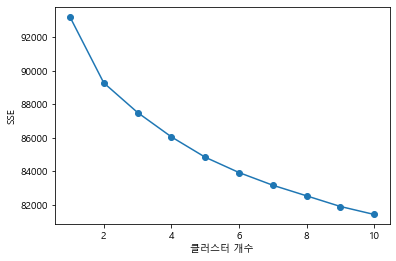

In [909]:
words = list(model_skip.wv.vocab)
word_score = model_skip.wv.__getitem__(words)
df = pd.DataFrame(word_score, index = words)


elbow(df)
plt.show()

In [910]:
kmeans = KMeans(n_clusters = 6, init = 'k-means++', max_iter = 300, random_state = 0)
kmeans.fit(df)
df['label'] = ''
df['label'] = kmeans.labels_


In [911]:
df['label'].value_counts()

1    5194
4    3346
2    2909
0    1404
5    1269
3     533
Name: label, dtype: int64

In [912]:
from math import sqrt

label_set = [0,1,2,3,4,5]

group = {}

for label in label_set:
    
    data = df[df['label'] == label].copy()
    data['euclidean distance'] = ''
    
    for index in data.index:
        data.loc[index,'euclidean distance'] = np.linalg.norm(data.loc[index][:-2]-kmeans.cluster_centers_[label]) # 유클리디안 거리 측정
         # 유클리디안 거리로 중심점과의 거리 측정
        
    data.sort_values(by = 'euclidean distance', ascending = True) # 중심점과 가장 거리가 가까운 요인들
    group[label] = data['euclidean distance'][:30].index # 30개만 뽑음

Topic 0 : 청년, 실태, 조사, 장기, 노동시장, 일자리, 정책 등 을 보았을 때 '취업'관련 정책에 대한 주제일 가능성이 높다고 판단했다.

Topic 1 : 끄다, 불만, 제발, 호구, 않다, 두렵다 등 부정적인 단어들이 많으며 임원진, 대화, 친구, 돈, 눈빛 등의 단어들과 연관지어 보았을 때, '취업'관련 다양한 문제들과 걱정거리에 대한 상담을 주제로 한 글일 가능성이 높다고 판단했다.

Topic 2 : 학생, 키우다, 지표, 기회, 액트, 필수, 교양 등의 단어들을 보아 '취업'에 대한 구체적인 방향이 정해지지 않은 상태(1~3학년)에서 취업 및 졸업 관련 질문을 하는 주제일 가능성이 높다고 판단했다.

Topic 3 : 인프라, 투자, 영향, 지향, 방향성, 리포트, 경기, 시사, 현직, 자산운용, 회계법인, 방안, 전략, 재무관리, 분석, 등 금융관련 단어들이 대부분인 것으로 보아 금융분야 취업을 
주제로 하는 글일 가능성이 높다고 판단했다.

Topic 4 : 학교, 위상, 취업, 대기업, 못, 입결, 수준, 이공, 이과, 공대의 단어들로 보아 중앙대학교와 '취업'간의 연관성을 주제로 한 글일 가능성이 높다고 판단했다.

Topic 5 : 활동, 모집, 참여, 모색, 설문, 링크, 소요, 응답, 기프티콘, 번호, 문의, 제출, 지원 등의 단어들을 보아 '취업'과 관련된 동아리에 관한 글이나 설문에 관한 글일 가능성이 높다고 판단했다.

In [913]:
pd.DataFrame(group, columns = label_set)

,0,1,2,3,4,5
0,등,사회,비롯,그로,갈수록,우수
1,인재,우리,하다,인프라,학교,제공
2,노인,인식,결과,투자,위상,활동
3,조,임원진,학생,영향,가다,모집
4,완전,들,과거,지향,취업,참여
5,청년,정작,인하다,방향성,대기업,및
6,실태,끄다,경우,업,못,모색
7,조사,내다,더욱,리포트,안달,■
8,장기,불만,현,경기,시점,설문
9,노동시장,생기지,다른,시사,이미,링크


### TF-IDF 분석

In [617]:
results_noun = [] # 모든 게시글의 명사를 토큰화해서 저장해둘 곳
okt = Okt()
for post in topic:
    r = []
    for key in post.keys():
        if not key in ['topic', 'description', 'vote', 'scrap']: # 본문이랑 댓글 분석 / 본문이 댓글 1에 해당되므로 중복을 제거하기 위해 description 제외
            
            r.append(post[key])
            
    r = ' '.join(r)
    r = re.sub('[-=.,#/?!:$%{}…ㅠ~ㅜㅋㅎㅌ><ㄷname^ㄱㄴㄲ;12]', '', r)
    
    tokens = okt.nouns(r)
    
    results_noun.append(tokens)

In [702]:
results_noun_words = []
for i in results_noun:
    for j in i:
        results_noun_words.append(j)

### 그나마 앞에서보다는 더 유의미해보이는 단어들이 보인다

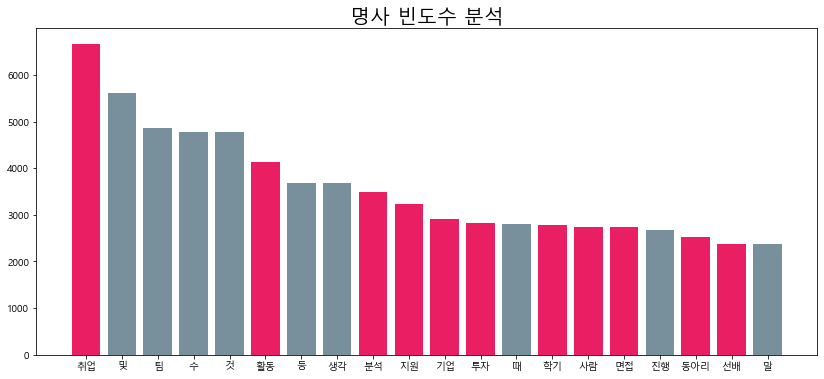

In [858]:
data = pd.DataFrame(results_noun_words)
data = data[0].value_counts().sort_values(ascending = False)[:20]
fig, ax= plt.subplots(figsize = (14,6))
color = ['#e91e63','#78909c','#78909c','#78909c','#78909c','#e91e63','#78909c','#78909c','#e91e63','#e91e63','#e91e63','#e91e63','#78909c','#e91e63','#e91e63','#e91e63','#78909c','#e91e63','#e91e63','#78909c']
plt.bar(x = data.index, height = data.values,  color = color)
plt.title('명사 빈도수 분석', fontsize = 20)
plt.show()

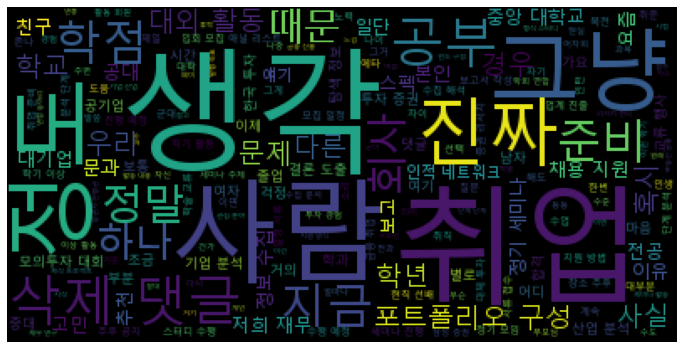

In [1050]:
data =  ' '.join(results_noun_words)
plt.figure(figsize=(12,8))
word_cloud = WordCloud(
                          font_path = 'c:/Windows/Fonts/malgun.ttf',
                          background_color='black',
                          max_font_size = 80
                         ).generate(data)
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

#### 마스킹 하는데 사용한 이미지

<img src="중앙대학교.png" alt="drawing" width="400"/>

<img src="학사모2.png" alt="drawing" width="400"/>

In [981]:
from PIL import Image

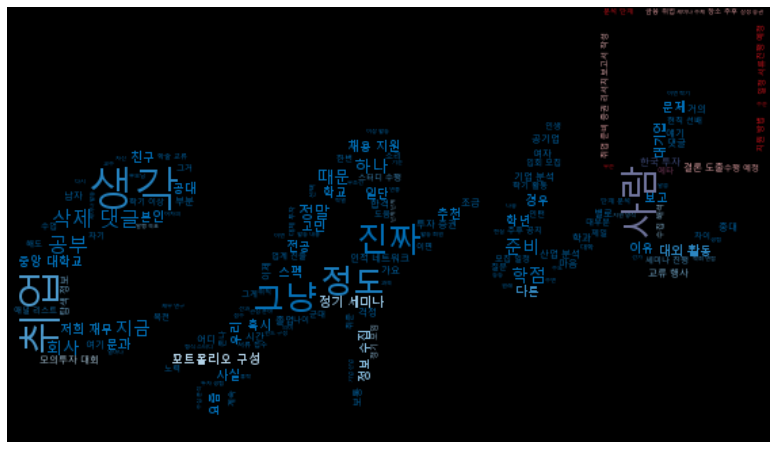

In [987]:
plt.figure(figsize = (14,8))
custom_mask = np.array(Image.open("중앙대학교.png"))
word_cloud = WordCloud(
    font_path = 'c:/Windows/Fonts/malgun.ttf',
    background_color="black",
    mask=custom_mask,
    max_font_size = 300,
 contour_color='black')
word_cloud.generate(data)

image_colors = ImageColorGenerator(custom_mask)
# image_colors.default_color = [0.6,0.6,0.6] # Important!!! at 2018.07.07


plt.imshow(word_cloud.recolor(color_func = image_colors), interpolation = 'bilinear')
plt.axis("off")
plt.show()

In [1057]:
import random

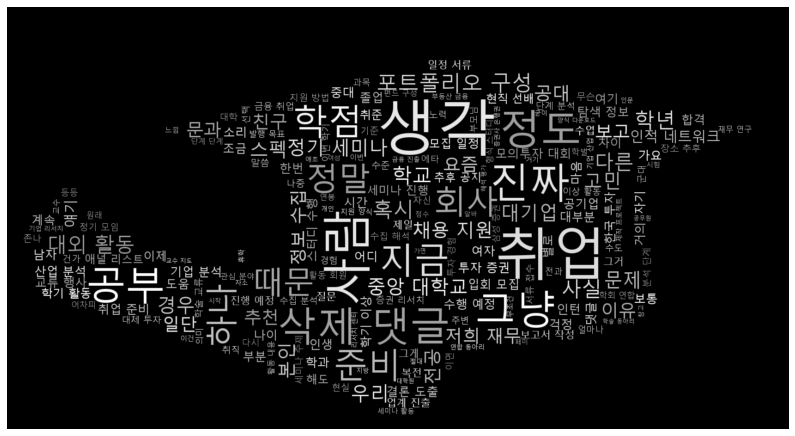

In [1059]:
plt.figure(figsize = (14,8))
custom_mask = np.array(Image.open("학사모2.png"))


def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

word_cloud = WordCloud(
    font_path = 'c:/Windows/Fonts/malgun.ttf',
    background_color="black",
    mask=custom_mask,
    max_font_size = 130,
 contour_color='black')
word_cloud.generate(data)
# image_colors = ImageColorGenerator(custom_mask)
plt.imshow(word_cloud.recolor(color_func = grey_color_func, random_state = 3),interpolation="bilinear")
# plt.imshow(word_cloud.recolor(color_func = 'image_colors'), interpolation = 'bilinear')
plt.axis("off")
plt.show()

### LDA분석

In [620]:
dictionary = corpora.Dictionary(results_noun)

In [621]:
corpus = [dictionary.doc2bow(noun) for noun in results_noun]

In [757]:
from gensim.models import CoherenceModel

### 임의로 4개의 토픽일 때를 본 후 불용어를 추가하는 식으로 단어 정리

In [629]:
def reLDAtoDF(stop_words, terms, nTopics):
    stop_word_list = list(set(stop_words.split()))
    
    renewed_terms = []
    for term in terms:
      stop_tokens = [i for i in term if not i in stop_word_list]
      renewed_terms.append(stop_tokens)
        
    dictionary = corpora.Dictionary(renewed_terms)
    corpus = [dictionary.doc2bow(term) for term in renewed_terms]
    
    model = models.ldamodel.LdaModel(corpus, num_topics= nTopics, id2word = dictionary)
    
    word_dict = {}
    for i in range(nTopics):
      words = model.show_topic(i, topn=20)
      word_dict['Topic #' + '{:02d}'.format(i+1)] = [i[0] for i in words]
      word_df = pd.DataFrame(word_dict)

    return dictionary, corpus, word_df, model.show_topics()

In [706]:
stop_words = '나 너 진짜 거 오늘 난 우리 뭐 집 너 때 뭐 전 때 응 좀 왜 내 존나 난 지금 저 네 전 요 오 더 뭐 저 전 야야 그 것 그거 그냥 이제 그거 거기 또 것 웅 또 햇 함 말\
임 개 말 옹 안 넹 이 임 안 애 해 니 애 시발 안 이 머 시 사람 데 알 바 걸 알 웅웅 및 등 수 회 분 제 명 및 팀 수 것 등 때 말'

### 좀더 내용에 집중하기 위해 오빠, 언니, 누나, 엄마와 같은 호칭은 다 뺐다

dictionary, corpus, word_df, show_topics = reLDAtoDF(stop_words, results_noun, 4)

Topic 1 : 분석, 세미나, 활동, 정보, 스터디, 보고서, 수집, 발표, 선배 등의 단어들을 보아 대외활동 관련 모집이나 질문에 대한 주제임을 알 수 있으며, 투자, 부동산, 재무, 금융, 경제 등의 단어가 같이 분포 해 있는 것으로 보아, 대부분의 대외활동은 금융관련 활동임을 추측해 볼 수 있다.

Topic 2 : 생각, 학기, 휴학, 활동, 지원, 친구, 시간 등의 단어들로 보아 취업 전 휴학에 대한 고민을 주제로 하는 글인 것을 추측해 볼 수 있으며, 많은 대학생들이 휴학기간동안 시간, 돈, 친구에 대한 고민이 많음을 추측해 볼 수 있다.

Topic 3 : 생각, 준비, 면접, 회사, 여자, 남자, 여성, 공기업 등의 단어들로 보아 기업과 직접적인 관련이 있는 주제이며, 이러한 주제일 경우 동등한 취준생이 아닌 남자와 여자를 각각 구분하여 생각하는 특징을 보였다.

Topic 4 : 학점, 활동, 지원, 선배, 생각, 동아리, 전공, 시험, 과목 등의 단어들로 보아 대학생활 위주의 주제임을 추측해 볼 수 있다.

In [707]:
word_df

,Topic #01,Topic #02,Topic #03,Topic #04
0,단계,취업,취업,취업
1,분석,생각,생각,학점
2,투자,학기,준비,활동
3,세미나,학교,면접,지원
4,활동,휴학,글,선배
5,부동산,기업,공부,생각
6,정보,댓글,댓글,동아리
7,진행,활동,기업,전공
8,학기,글,정도,교수
9,스터디,지원,회사,면접


In [708]:
show_topics

[(0,
  '0.022*"단계" + 0.019*"분석" + 0.012*"투자" + 0.010*"세미나" + 0.010*"활동" + 0.009*"부동산" + 0.008*"정보" + 0.008*"진행" + 0.008*"학기" + 0.008*"스터디"'),
 (1,
  '0.008*"취업" + 0.006*"생각" + 0.004*"학기" + 0.004*"학교" + 0.004*"휴학" + 0.004*"기업" + 0.004*"댓글" + 0.003*"활동" + 0.003*"글" + 0.003*"지원"'),
 (2,
  '0.017*"취업" + 0.013*"생각" + 0.008*"준비" + 0.007*"면접" + 0.006*"글" + 0.005*"공부" + 0.005*"댓글" + 0.005*"기업" + 0.005*"정도" + 0.004*"회사"'),
 (3,
  '0.015*"취업" + 0.010*"학점" + 0.009*"활동" + 0.008*"지원" + 0.006*"선배" + 0.006*"생각" + 0.006*"동아리" + 0.006*"전공" + 0.006*"교수" + 0.005*"면접"')]

### perplexity score와 coherence score를 통해 적당한 토픽 수를 책정

In [758]:
perplexity_values = []
coherence_values = []
for i in range(2,10):
    ldamodel = models.ldamodel.LdaModel(corpus, num_topics=i, id2word = dictionary, random_state = 100)
    perplexity_values.append(ldamodel.log_perplexity(corpus))
    
    coherence_model_lda = CoherenceModel(model = ldamodel, texts=terms, dictionary=dictionary, topn=10)
    coherence_lda = coherence_model_lda.get_coherence()
    coherence_values.append(coherence_lda)

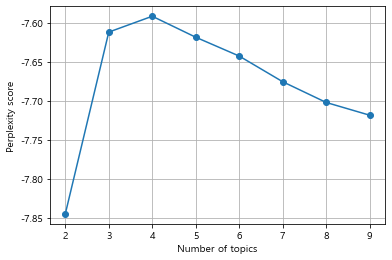

In [759]:
x = range(2,10)
plt.plot(x, perplexity_values, marker = 'o')
plt.xlabel("Number of topics")
plt.ylabel("Perplexity score")
plt.grid()
plt.show()

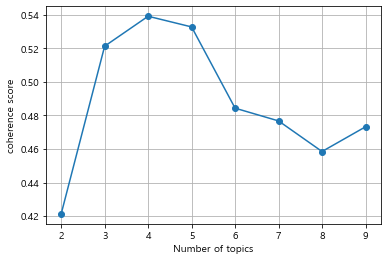

In [760]:
x = range(2,10)
plt.plot(x, coherence_values, marker = 'o')
plt.xlabel("Number of topics")
plt.ylabel("coherence score")
plt.grid()
plt.show()

### 적정 토픽수로 coherence score도 높은 편이고 perplexity score도 감소 추세인 5개를 골랐다

In [777]:
import pyLDAvis
import pyLDAvis.gensim

In [780]:
pyLDAvis.enable_notebook()

model_5 = models.ldamodel.LdaModel(corpus, num_topics=5, id2word = dictionary, random_state = 100)

data = pyLDAvis.gensim.prepare(model_5, corpus, dictionary)
data

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.141818 -0.032825       1        1  34.569702
0     -0.072685  0.069527       2        1  26.058824
2      0.091456  0.040731       3        1  20.011755
1     -0.137692 -0.036681       4        1  15.279757
4     -0.022897 -0.040751       5        1   4.079963, topic_info=     Term         Freq        Total Category  logprob  loglift
510    단계  2483.000000  2483.000000  Default  30.0000  30.0000
638    분석  2677.000000  2677.000000  Default  29.0000  29.0000
21     생각  3823.000000  3823.000000  Default  28.0000  28.0000
5790  세미나  1685.000000  1685.000000  Default  27.0000  27.0000
96     활동  4035.000000  4035.000000  Default  26.0000  26.0000
...   ...          ...          ...      ...      ...      ...
1057   대학    71.816143  1233.195880   Topic5  -5.7258   0.3558
176    면접    92.128446  2834.678990   Topic5  -5.4768  -0.2274
1704   분야    70.770681  1319.749284   Topic5  -5.7405   0.2733
83     선배    78.012245  2560.082737   Topic5  -5.6431  -0.2918
111    관련    65.881417  1227.799679   Topic5  -5.8121   0.2740

[425 rows x 6 columns], token_table=      Topic      Freq Term
term                      
4735      1  0.025131   가상
4735      2  0.142409   가상
4735      3  0.016754   가상
4735      4  0.762306   가상
4735      5  0.058639   가상
...     ...       ...  ...
387       1  0.800566   휴학
387       2  0.111406   휴학
387       3  0.023317   휴학
387       4  0.046635   휴학
387       5  0.018136   휴학

[1394 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 3, 2, 5])

In [781]:
nTopics = 5

# model_5

word_dict = {}
for i in range(nTopics):
  words = model_5.show_topic(i, topn=20)
  word_dict['Topic #' + '{:02d}'.format(i+1)] = [i[0] for i in words]
  word_df_5 = pd.DataFrame(word_dict)

Topic #01 , Topic #02, Topic #05는 비슷한 단어들로 구성되어있으며
활동, 동아리, 스터디, 포트폴리오, 선배 등의 단어들로 보아 '취업'관련 대외활동과 관련된 주제임을 추측할 수 있다.
또한 세 Topic 모두 금융, 투자, 부동산, 증권, 재무 등 금융관련 단어들이 분포되어 있는 것으로 보아 에브리타임을 통한 대외활동 모집은 대부분 금융관련 활동임을 추측해 볼 수 있다.

Topic #03은 면접, 사회, 문제, 여자, 여성, 남자, 기업, 등의 단어들로 보아 기업과 직접적인 연관이 있는 주제일 가능성이 높다고 판단했으며, 기업의 성차별 문제를 다루는 내용들이 많은을 추측할 수 있었다.

Topic #04는 학점, 면접, 공부, 학년, 졸업, 학기 등의 단어들로 보아 성적을 포함한 취업관련 대학 생활에 대한 주제임일 가능성이 높다고 판단했다.

In [782]:
word_df_5

,Topic #01,Topic #02,Topic #03,Topic #04,Topic #05
0,활동,단계,취업,취업,분석
1,동아리,분석,생각,생각,취업
2,투자,정보,지원,학점,생각
3,지원,세미나,급,면접,단계
4,진행,보고서,준비,준비,학기
5,취업,투자,면접,댓글,경제
6,학기,수집,사회,글,기업
7,선배,재무,문제,공부,활동
8,모집,활동,여자,정도,진행
9,연합,예정,일,학년,스터디


# 결론 및 제언

##### 아무래도 명사만 추출하고 빈도, 문서별 점수를 매겨(원핫인코딩) 주제분석을 하는 LDA방식이 더 직관적으로 단어들이 분류된 거 같다고 생각된다.
##### 다만 word2vec의 경우 특정 단어와 앞뒤 단어들과의 관계를 고려한다는 점에서 잠재력 측면에서는 wor2vec이 더 높다고 생각하였다.
##### 따라서 둘을 결합한 방식이 나온다면 더욱 정확한 주제분석이 가능할 것으로 생각된다.


##### 아쉬운 점 :
##### word2vec을 통한 주제분석과 LDA를 이용한 주제분석의 성능을 비교하고 싶었는데 실제 게시글들의 주제에 대한 레이블이 없어서 비교를 하지 못한 점이 아쉬웠다.
##### LDA와 비교하기 위해서는 word2vec도 명사만 뽑아서 해보는게 어땠을까 싶다.


### 한 학기 동안 고생 많으셨습니다.
### 감사합니다.




### 아아.. 결국 차단당했습니다.. 몇 안되는 낙이었는데 ㅠㅠ

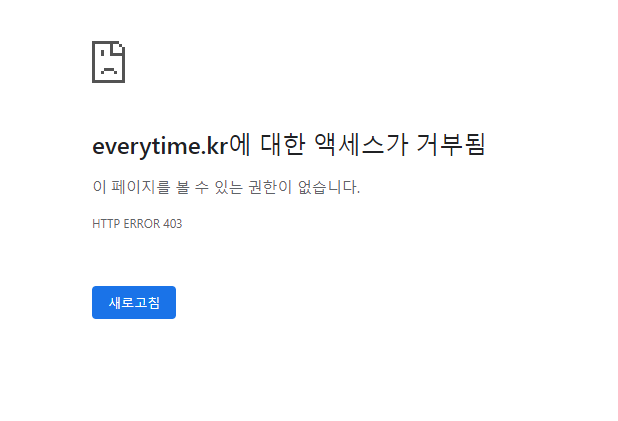